7. Объединение DataFrame: join, merge

У таблиц ratings и movies есть общий столбец movieId, который каждому фильму из таблицы movies ставит в соответствие поставленные ему оценки из таблицы ratings. Мы хотим объединить их в единую структуру согласно этому соответствию. Объединения такого рода часто называют объединением по ключевому столбцу.

→ Однако прежде чем мы перейдём к дальнейшей работе с нашими таблицами о фильмах, мы должны рассмотреть основные типы объединения таблиц.

ТИПЫ ОБЪЕДИНЕНИЙ

Типы объединений в Pandas тесно связаны с операцией join из SQL, которую мы будем рассматривать в курсе в дальнейшем.

Они представлены на схеме ниже в виде кругов Эйлера. 

Круги Эйлера — это геометрический способ отобразить отношения между множествами. Мы уже сталкивались с базовыми операциями между множествами (пересечением, объединением и вычитанием), когда говорили о множествах в модуле PYTHON-2.


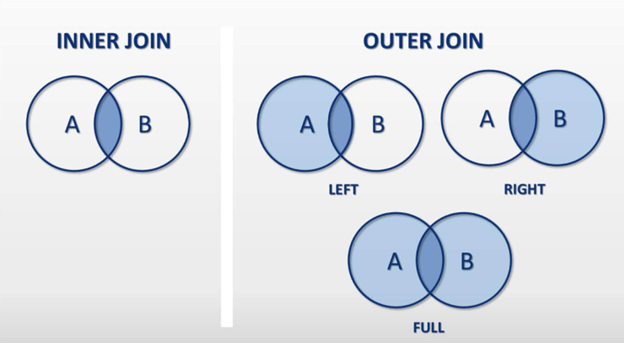


Прежде чем мы перейдём к дальнейшей работе с таблицами о фильмах, рассмотрим два основных типа объединения таблиц:

inner (внутреннее)

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

Аналогия в теории множеств
Пересечение (intersection) множеств А и В.

Строки, для которых совпадение не было найдено, удаляются.

outer (внешнее)

Данный тип делится на три подтипа:

full — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.

Аналогия в теории множеств
Объединение (union) множеств А и В.

left — для всех записей из «левой» таблицы (например, ratings) ведётся поиск соответствий в «правой» (например, movies). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из ratings.

Аналогия в теории множеств
Вычитание (difference) множества B из результата объединения (union) множеств А и В.

right — аналогично предыдущему, но остаются значения только из «правой» таблицы. 

Аналогия в теории множеств
Вычитание (difference) множества А из результата объединения (union) множеств А и В

Открыть примечание
Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).

МЕТОД ОБЪЕДИНЕНИЯ JOIN

Для объединения двух таблиц по индексам используется метод DataFrame join(). Однако данный метод можно применить и для того, чтобы объединить таблицы по ключевому столбцу (в нашем случае это movieId).

Кликните на плашку, чтобы увидеть информацию ↓

Основные параметры метода join()

other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».
how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.
on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.
Ниже представлена общая схема работы метода join() в зависимости от типа объединения:


![схема работы метода join().png](<attachment:схема работы метода join().png>)

Если использовать метод join() «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

Проверим это, объединив таблицы типом left. Так как в наших таблицах есть одноимённые столбцы, установим один из суффиксов, чтобы избежать ошибки:

In [ ]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='left'
)
display(joined_false)

![объединив таблицы типом left.png](<attachment:объединив таблицы типом left.png>)
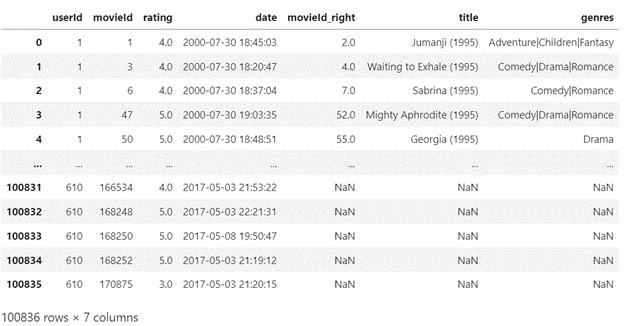

При объединении таблиц по индексам в результирующую таблицу попали все строки из «левой» таблицы, а недостающие строки из «правой» были заполнены пропусками. Так работает тип объединения left.

Попробуйте изменить тип объединения, чтобы посмотреть на разницу результирующих таблиц.

Обратите внимание, что в данном случае у нас получилось два столбца, соответствующих идентификатору фильма: один — из «левой» таблицы (movieId), а другой — из «правой» (movieId_right).

Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [ ]:
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

![совместить табл_метод join().png](<attachment:совместить табл_метод join().png>)

В результате такого объединения для каждого идентификатора фильма movieId в таблице ratings_dates найден совпадающий с ним идентификатор movieId в таблице movies и присоединена информация о самом фильме (title и genres). Это как раз то, что нам нужно.

Обратите внимание, что в результате такого объединения остался лишь один столбец movieId.

Примечание. Join() также можно использовать с параметром how='outer'.

МЕТОД ОБЪЕДИНЕНИЯ MERGE

Аналогично предыдущему, метод merge() предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

Кликните на плашку, чтобы увидеть информацию ↓

Основные параметры метода merge()

right — присоединяемая таблица. По умолчанию она является «правой».
how — параметр типа объединения. По умолчанию принимает значение 'inner'.
on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.
left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.
right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

→ Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

Посмотрим на метод merge() в действии. Произведём слияние наших таблиц и получим ту же таблицу, что и ранее:

In [ ]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)
display(merged.head())

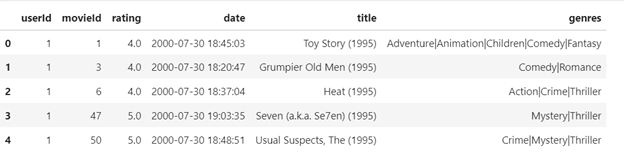

Проверим, что число строк в таблице ratings_dates совпадает с числом строк в результирующей таблице merged:

In [ ]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

# Число строк в таблице ratings_dates: 100836
# Число строк в таблице merged: 100836
# True

Всё прошло успешно: для каждой оценки пользователя мы нашли информацию о фильме, которому она была выставлена.

ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ MERGE()

?
Возникает вопрос: почему мы выбрали тип объединения left, а не full, например?

Найти ответ нам поможет пример. Объединим ratings_dates с movies по ключевому столбцу movieId, но с параметром how='outer' (full outer) и выведем размер таблицы, а также её «хвост»:

In [ ]:
merged2 = ratings_dates.merge(
    movies,
    on='movieId',
    how='outer'
)
print('Число строк в таблице merged2: ', merged2.shape[0])
display(merged2.tail())

# Число строк в таблице merged: 100854

![ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ MERGE.png](<attachment:ОСОБЕННОСТИ ИСПОЛЬЗОВАНИЯ MERGE.png>)
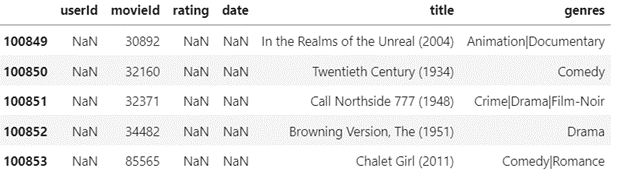

Результирующее число строк в таблице увеличилось. Но за счёт чего?

Оказывается, в таблице movies содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом full outer информация о фильмах перенеслась из таблицы movies в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы ratings_dates заполнились пропусками (NaN). Такие фильмы были записаны в конец таблицы.

Важно! Учитывайте такие нюансы при работе с несколькими таблицами и всегда проверяйте результат объединения.

→ Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.

Рассмотрим пример: объединим таблицы ratings1 и ratings2, как мы уже делали раньше, но теперь используем метод merge():

In [ ]:
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)
# Число строк в таблице merge_ratings: 100836

![ratings1_ratings_метод merge().png](<attachment:ratings1_ratings_метод merge().png>)

Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

КАКОЙ МЕТОД ОБЪЕДИНЕНИЯ ИСПОЛЬЗОВАТЬ?

Итак, мы рассмотрели три основных метода объединения таблиц: concat(), join() и merge(). Давайте структурируем материал, изложенный ранее, в виде небольшой блок-схемы, которая поможет вам определить, какой метод является предпочтительным при объединении таблиц.

![КАКОЙ МЕТОД ОБЪЕДИНЕНИЯ ИСПОЛЬЗОВАТЬ.png](<attachment:КАКОЙ МЕТОД ОБЪЕДИНЕНИЯ ИСПОЛЬЗОВАТЬ.png>)

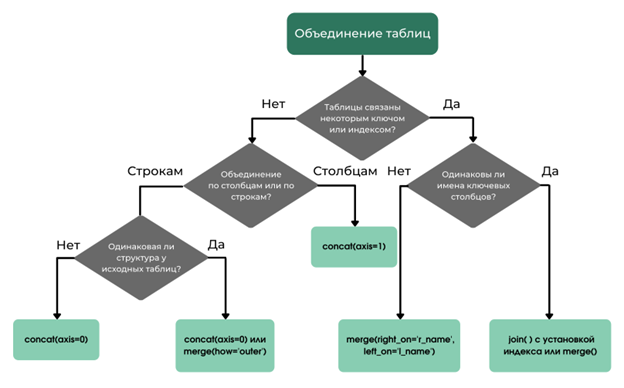

Задание 7.1

Какой параметр методов join() и merge() отвечает за используемый тип объединения?

(how)

Задание 7.2

В документации по методу merge()https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html  найдите параметры, которые позволяют управлять объединением таблиц по индексам:

(left_index, right_index)

Для объединения двух таблиц по индексам с помощью метода merge() необходимо установить значение параметров left_index и right_index на True.

Задание 7.3

Дано две исходных таблицы:

Какой из перечисленных вариантов кода позволяет получить представленный ниже результат?

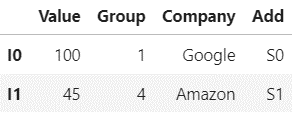

In [ ]:
data_1 = pd.DataFrame({'Value': [100, 45, 80],
                       'Group': [1, 4, 5]},
                      index = ['I0', 'I1', 'I2']
                     )

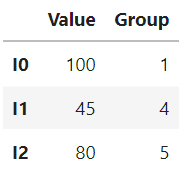

In [ ]:
data_2 = pd.DataFrame({'Company': ['Google', 'Amazon', 'Facebook'],
                       'Add': ['S0', 'S1', 'S7']},
                      index = ['I0', 'I1', 'I3']
                     )

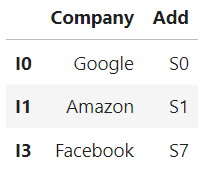

In [ ]:
data_1.join(data_2, how='inner')

Задание 7.4

Даны две исходные таблицы:

Какой из перечисленных вариантов кода позволяет получить представленный ниже результат?

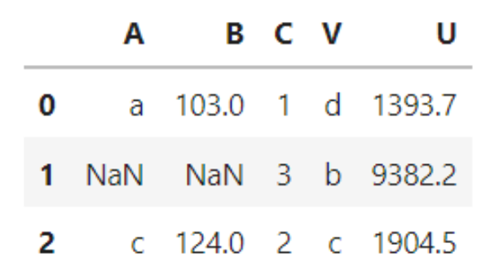


Подсказка (1 из 3): Столбцы таблицы а идут первыми среди столбцов результирующей таблицы, поэтому она является «левой» таблицей в объединении, а таблица b — «правой».
Подсказка (2 из 3): Объединение производилось по столбцу C. В ином случае столбцы C из таблиц а и b повторялись бы.
Подсказка (3 из 3): Тип объединения — right, так как остались записи из «правой» таблицы, а недостающие записи из «левой» заполнены пропусками.

In [ ]:
a = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [103, 214, 124], 'C': [1, 4, 2]})

In [ ]:
b = pd.DataFrame({'V': ['d', 'b', 'c'], 'U': [1393.7, 9382.2, 1904.5], 'C': [1, 3, 2]})

In [ ]:
a.merge(b, how='right', on='C')

Задание 7.5

Даны две таблицы: items_df, в которой содержится информация о наличии товаров на складе, и purchase_df с данными о покупках товаров.

Первая:

In [ ]:
items_df = pd.DataFrame({
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
    'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})

Вторая:

In [ ]:
purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})

'Samsung', 'Samsung', 'LG', 'ZTE'],
    'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
})
Вторая:

purchase_df = pd.DataFrame({
    'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
    'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
    'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
})
Информация в таблицах представлена в виде следующих столбцов:

item_id — идентификатор модели;
vendor — производитель модели;
stock_count — имеющееся на складе количество данных моделей (в штуках);
purchase_id — идентификатор покупки;
price — стоимость модели в покупке.
Вам необходимо сделать следующее:

Сформируйте DataFrame merged, так чтобы после объединения purchase_df и items_df остались модели, которые учтены на складе и имели продажи.

На основе таблицы merged найдите суммарную выручку, которую можно было бы получить от продажи всех товаров, имеющихся на складе. Результат занесите в переменную income

In [ ]:
import pandas as pd

items_df = pd.DataFrame({
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
            'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
            'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
        })

purchase_df = pd.DataFrame({
            'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
            'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
        })


In [1]:
merged = items_df.merge(purchase_df, how='inner', on='item_id')
income = (merged['price'] * merged['stock_count']).sum()

NameError: name 'items_df' is not defined